In [607]:
!git --version
!pwd  # shows your current working directory
!ls   # shows notebook files
!git init
# Add the remote
!git remote add origin https://github.com/jacquelin-hash/ai4all-final-project.git
# Stage all files
!git add .
!git remote -v


git version 2.47.1
/Users/valaryanguzuzu/Desktop/AI4ALL
Cleaning.ipynb      Data_Cleaning.ipynb spotify_dataset.csv
Reinitialized existing Git repository in /Users/valaryanguzuzu/Desktop/AI4ALL/.git/
error: remote origin already exists.
origin	https://github.com/jacquelin-hash/ai4all-final-project.git (fetch)
origin	https://github.com/jacquelin-hash/ai4all-final-project.git (push)


In [407]:
#mporting libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [504]:
#load dataset
spotify_data = pd.read_csv("spotify_dataset.csv",index_col=0)

In [506]:
#data overview
print("First 5 rows of the dataset:")
spotify_data.head()

First 5 rows of the dataset:


,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [508]:
# Overview of the dataset
print("\nDataset Info:")
spotify_data.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 114000 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          114000 non-null  object 
 1   artists           113999 non-null  object 
 2   album_name        113999 non-null  object 
 3   track_name        113999 non-null  object 
 4   popularity        114000 non-null  int64  
 5   duration_ms       114000 non-null  int64  
 6   explicit          114000 non-null  bool   
 7   danceability      114000 non-null  float64
 8   energy            114000 non-null  float64
 9   key               114000 non-null  int64  
 10  loudness          114000 non-null  float64
 11  mode              114000 non-null  int64  
 12  speechiness       114000 non-null  float64
 13  acousticness      114000 non-null  float64
 14  instrumentalness  114000 non-null  float64
 15  liveness          114000 non-null  float64
 16  valence   

In [510]:
spotify_data.columns

Index(['track_id', 'artists', 'album_name', 'track_name', 'popularity',
       'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'track_genre'],
      dtype='object')

In [512]:
spotify_data['key'].head()

0    1
1    1
2    0
3    0
4    2
Name: key, dtype: int64

In [514]:
#shape of dataset - 114000 rows, 21 columns
print("\nDataset shape (rows, columns):")
spotify_data.shape


Dataset shape (rows, columns):


(114000, 20)

In [516]:
#summary statistics
print("\nSummary stats:")
spotify_data.describe()


Summary stats:


,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


In [518]:
spotify_data.dtypes

track_id             object
artists              object
album_name           object
track_name           object
popularity            int64
duration_ms           int64
explicit               bool
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature        int64
track_genre          object
dtype: object

In [520]:
#inspect for missing values
print("\nMissing values:")
spotify_data.isnull().sum()


Missing values:


track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [522]:
#no missing values; so might we have duplicates?
    #Check for Duplicates
num_duplicates = spotify_data.duplicated().sum()
print(f"There are {num_duplicates} duplicated rows in the DataFrame.")

There are 450 duplicated rows in the DataFrame.


In [524]:
# Display all duplicated rows
duplicated_rows = cleaned_df[cleaned_df.duplicated(keep=False)]
duplicated_rows.head()  # show a sample

,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,track_genre,instrumental,speech_level,liveness_type
1874,Buena Onda Reggae Club,Disco 2,Song for Rollins,16,219346,False,0.841,0.577,-7.544,1,0.0438,0.2380,0.860,0.0571,0.843,90.522,afrobeat,Yes,Low,Studio
1925,Buena Onda Reggae Club,Disco 2,Song for Rollins,16,219346,False,0.841,0.577,-7.544,1,0.0438,0.2380,0.860,0.0571,0.843,90.522,afrobeat,Yes,Low,Studio
2044,The Killers;Ryan Pardey,Alternative Christmas 2022,Don't Shoot Me Santa,0,245106,False,0.588,0.847,-4.164,1,0.0705,0.0601,0.000,0.3070,0.662,120.041,alt-rock,No,Low,Studio
2046,The Killers;Ryan Pardey,Alternative Christmas 2022,Don't Shoot Me Santa,0,245106,False,0.588,0.847,-4.164,1,0.0705,0.0601,0.000,0.3070,0.662,120.041,alt-rock,No,Low,Studio
2082,The Smashing Pumpkins,Alternative Christmas 2022,Christmastime,0,196723,False,0.165,0.434,-8.163,1,0.0288,0.3160,0.171,0.2130,0.186,77.983,alt-rock,No,Low,Studio


In [526]:
# Drop duplicate rows, keeping only the first instance
cleaned_df = cleaned_df.drop_duplicates(keep='first').reset_index(drop=True)
print("Duplicates after dropping:", cleaned_df.duplicated().sum())

Duplicates after dropping: 0


In [528]:
#spotify_data.drop(columns=['Unnamed: 0'], inplace=True)
spotify_data.reset_index(drop=True, inplace=True)
spotify_data.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [530]:
# Drop rows with tempo == 0 or duration_ms == 0 or energy == 0 or danceability == 0
cleaned_df = spotify_data[
    (spotify_data['tempo'] > 0) &
    (spotify_data['duration_ms'] > 0) &
    (spotify_data['energy'] > 0) &
    (spotify_data['danceability'] > 0) &
    (spotify_data['loudness'] > -40)
].drop(columns=[
    'track_id', 'key', 'time_signature'
])

In [532]:
print("\nCleaned dataframe:")
cleaned_df.head()


Cleaned dataframe:


,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,track_genre
0,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,acoustic
1,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,acoustic
2,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,acoustic
3,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,acoustic
4,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,acoustic


In [534]:
print("Original:", len(spotify_data))
print("After cleaning:", len(cleaned_df))

Original: 114000
After cleaning: 113817


In [536]:
cleaned_df.isnull().sum() #no  missing values; nice!

artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
track_genre         0
dtype: int64

In [538]:
# Identify numeric variables (int or float)
numeric_vars = cleaned_df.select_dtypes(include=["int64", "float64"]).columns.to_list()
print(f"\nNumeric Variables ({len(numeric_vars)}):\n{numeric_vars}")

# Identify categorical variables (object / string)
categorical_vars = cleaned_df.select_dtypes(include=["object"]).columns.to_list()
print(f"\nCategorical Variables ({len(categorical_vars)}):\n{categorical_vars}")

# Identify integer columns that might actually be categorical (few unique values)
potential_categorical_vars = [
    col for col in cleaned_df.select_dtypes(include=["int64"]).columns
    if cleaned_df[col].nunique() <= 10
]
print(f"\nPotentially Categorical Variables (stored as int but few unique values):\n{potential_categorical_vars}")


Numeric Variables (12):
['popularity', 'duration_ms', 'danceability', 'energy', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

Categorical Variables (4):
['artists', 'album_name', 'track_name', 'track_genre']

Potentially Categorical Variables (stored as int but few unique values):
['mode']


In [540]:
# Detect Outliers in numeric columns using the 1.5 * IQR rule
numeric_columns = cleaned_df.select_dtypes(include=["int64", "float64"]).columns

Q1 = cleaned_df[numeric_columns].quantile(0.25)
Q3 = cleaned_df[numeric_columns].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Count number of outliers per column
outliers = cleaned_df[numeric_columns].apply(
    lambda col: ((col < lower_bound[col.name]) | (col > upper_bound[col.name])).sum()
)

# Print columns that contain outliers
print("Outlier count per numeric column (only those > 0):")
print(outliers[outliers > 0])

Outlier count per numeric column (only those > 0):
popularity              2
duration_ms          5608
danceability          496
loudness             6085
speechiness         13210
instrumentalness    25198
liveness             8579
tempo                 470
dtype: int64


In [542]:
cleaned_df.describe()

,popularity,duration_ms,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,113817.000000,1.138170e+05,113817.000000,113817.000000,113817.000000,113817.000000,113817.000000,113817.000000,113817.000000,113817.000000,113817.000000,113817.000000
mean,33.233700,2.281239e+05,0.567653,0.642231,-8.232442,0.637532,0.084771,0.314526,0.155207,0.213243,0.474791,122.317926
std,22.316239,1.063072e+05,0.172327,0.250657,4.968914,0.480715,0.105750,0.332241,0.308727,0.189943,0.258815,29.652164
min,0.000000,1.580000e+04,0.051300,0.000020,-39.869000,0.000000,0.022100,0.000000,0.000000,0.009250,0.000000,30.200000
25%,17.000000,1.742130e+05,0.457000,0.473000,-9.998000,0.000000,0.035900,0.016900,0.000000,0.098000,0.261000,99.435000
50%,34.000000,2.130000e+05,0.580000,0.685000,-6.997000,1.000000,0.049000,0.168000,0.000041,0.132000,0.464000,122.023000
75%,50.000000,2.615960e+05,0.695000,0.854000,-4.999000,1.000000,0.084600,0.597000,0.047500,0.273000,0.683000,140.077000
max,100.000000,5.237295e+06,0.985000,1.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000


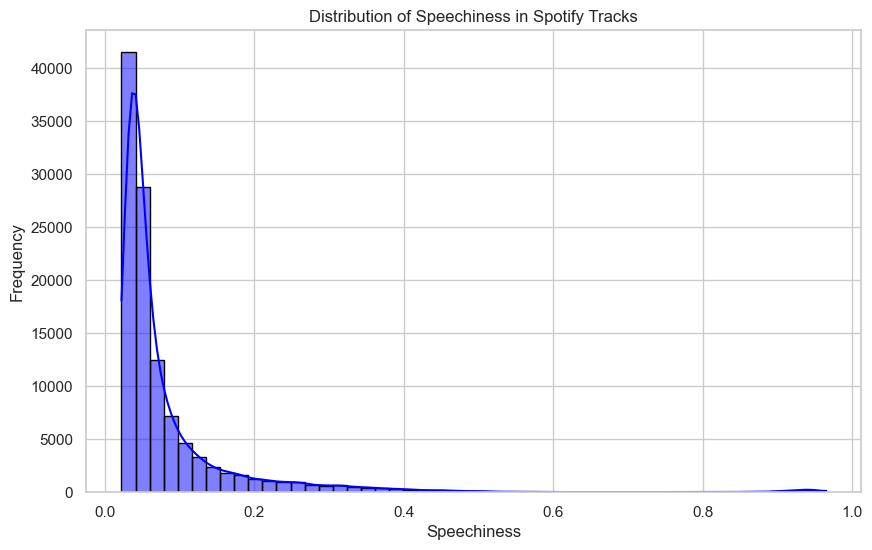

In [544]:
# Distribution of speechiness
plt.figure(figsize=(10, 6))
sns.histplot(data=cleaned_df, x='speechiness', bins=50, kde=True, color='blue', edgecolor='black')

# Labels and title
plt.title('Distribution of Speechiness in Spotify Tracks')
plt.xlabel('Speechiness')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

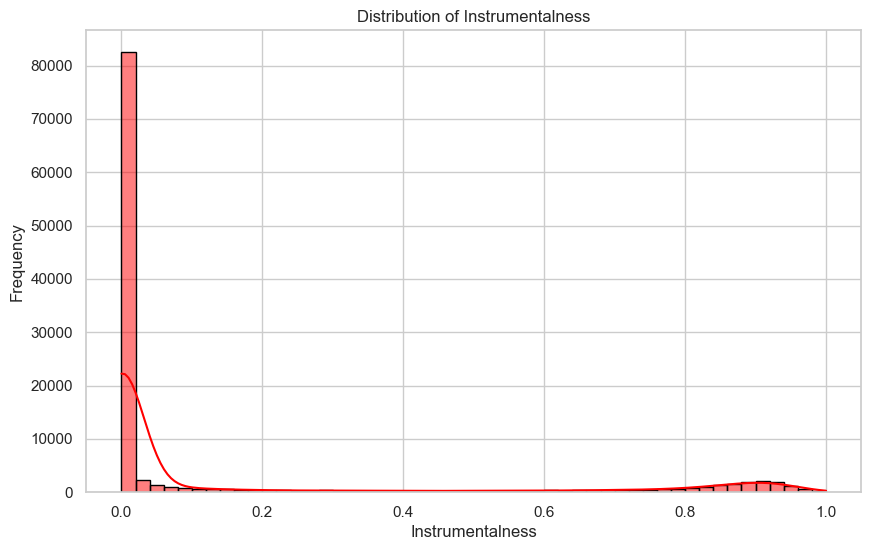

In [587]:
# Distribution of Instrumentalness
plt.figure(figsize=(10, 6))
sns.histplot(data=spotify_data, x='instrumentalness', bins=50, kde=True, color='red', edgecolor='black')
plt.title('Distribution of Instrumentalness')
plt.xlabel('Instrumentalness')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

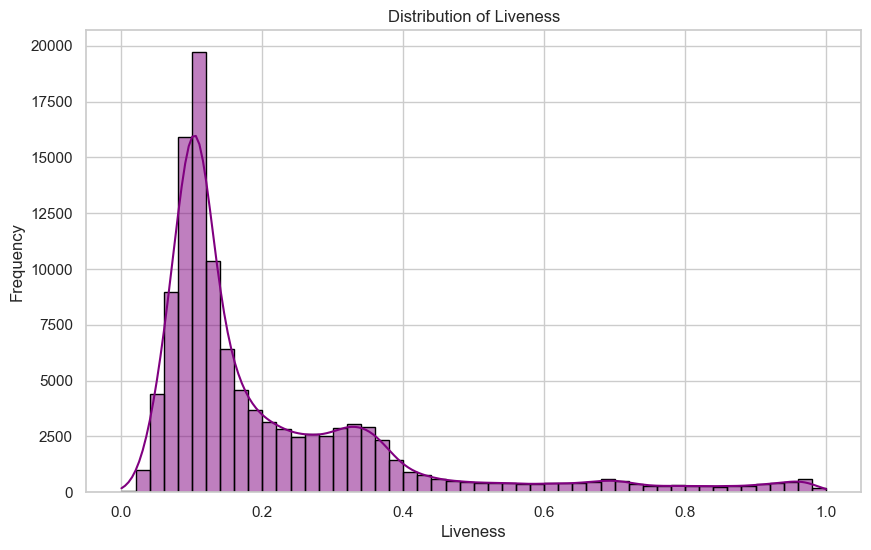

In [547]:
# Distribution of Liveness
plt.figure(figsize=(10, 6))
sns.histplot(data=spotify_data, x='liveness', bins=50, kde=True, color='purple', edgecolor='black')
plt.title('Distribution of Liveness')
plt.xlabel('Liveness')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


Visualizing outliers:


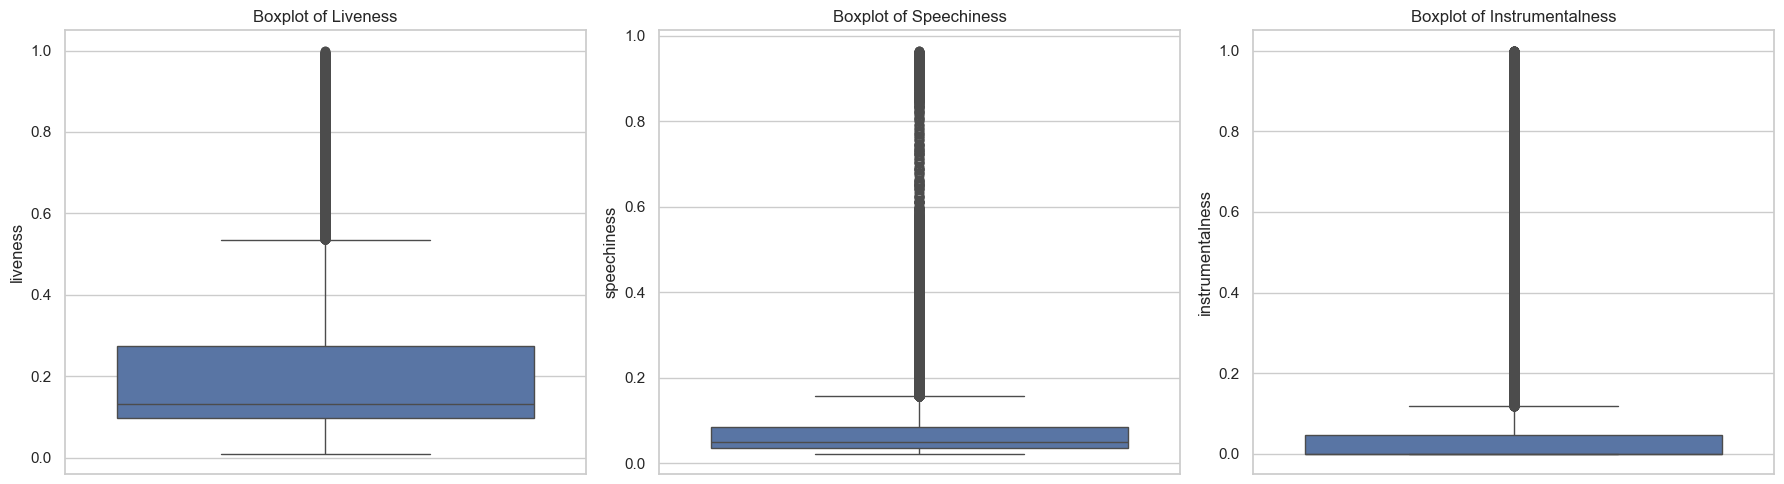

In [549]:
print("\nVisualizing outliers:")
plt.figure(figsize=(18, 5))

# Liveness
plt.subplot(1, 3, 1)
sns.boxplot(y=cleaned_df["liveness"])
plt.title("Boxplot of Liveness")

# Speechiness
plt.subplot(1, 3, 2)
sns.boxplot(y=cleaned_df["speechiness"])
plt.title("Boxplot of Speechiness")

# Instrumentalness
plt.subplot(1, 3, 3)
sns.boxplot(y=cleaned_df["instrumentalness"])
plt.title("Boxplot of Instrumentalness")

plt.tight_layout()
plt.show()


        instrumentalness instrumental
113980          0.000002           No
113981          0.000000           No
113982          0.000428           No
113983          0.000009           No
113984          0.000000           No
113985          0.000013           No
113986          0.949000          Yes
113987          0.000000           No
113988          0.000003           No
113989          0.000000           No
113990          0.924000          Yes
113991          0.000000           No
113992          0.000002           No
113993          0.000000           No
113994          0.022900           No
113995          0.928000          Yes
113996          0.976000          Yes
113997          0.000000           No
113998          0.000000           No
113999          0.000000           No


/var/folders/r8/17pq6sn558jfc7m45jly_l2r0000gn/T/ipykernel_93585/281513413.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=cleaned_df, x="instrumental", order=["Yes", "No"], palette="muted")


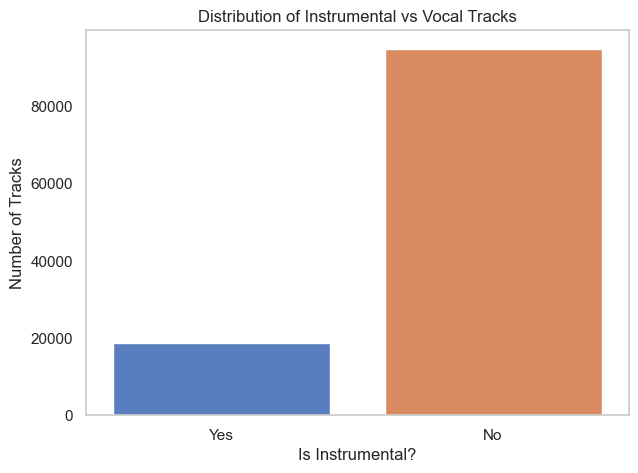

In [551]:
#Binarize instrumentalness:
    # 'instrumentalness' is a value from 0.0 to 1.0:
    # - Closer to 0 the track likely has vocals.
    # - Closer to 1 the track is likely instrumental (no vocals).

    # 'instrumental' is a new column we make:
        # - no if instrumentalness is 0.5 or less (has vocals)
        # - yes if instrumentalness is more than 0.5 (instrumental)

            # This helps make analysis easier by turning a float into a clear yes/no.
# Create a new column for binary instrumental label
cleaned_df["instrumental"] = cleaned_df["instrumentalness"].apply(lambda x: "Yes" if x > 0.5 else "No")

# Preview the updated DataFrame
print(cleaned_df[["instrumentalness", "instrumental"]].tail(20))
plt.figure(figsize=(7, 5))
sns.countplot(data=cleaned_df, x="instrumental", order=["Yes", "No"], palette="muted")
plt.title("Distribution of Instrumental vs Vocal Tracks")
plt.xlabel("Is Instrumental?")
plt.ylabel("Number of Tracks")
plt.grid(axis="y")
plt.show()

In [552]:
cleaned_df.tail()

,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,track_genre,instrumental
113995,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.235,-16.393,1,0.0422,0.640,0.928,0.0863,0.0339,125.995,world-music,Yes
113996,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.117,-18.318,0,0.0401,0.994,0.976,0.1050,0.0350,85.239,world-music,Yes
113997,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.329,-10.895,0,0.0420,0.867,0.000,0.0839,0.7430,132.378,world-music,No
113998,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.506,-10.889,1,0.0297,0.381,0.000,0.2700,0.4130,135.960,world-music,No
113999,Cesária Evora,Miss Perfumado,Barbincor,22,241826,False,0.526,0.487,-10.204,0,0.0725,0.681,0.000,0.0893,0.7080,79.198,world-music,No


In [554]:
#What speechiness Means (by Spotify):
    #< 0.33 Likely music (low speech content)
    #0.33–0.66 Mixed (music + some speech, like rap or spoken word)
    #> 0.66 Likely spoken word (e.g., podcasts, audiobooks)

   speechiness speech_level
0       0.1430          Low
1       0.0763          Low
2       0.0557          Low
3       0.0363          Low
4       0.0526          Low


/var/folders/r8/17pq6sn558jfc7m45jly_l2r0000gn/T/ipykernel_93585/3499869265.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=cleaned_df, x="speech_level", order=["Low", "Medium", "High"], palette="muted")


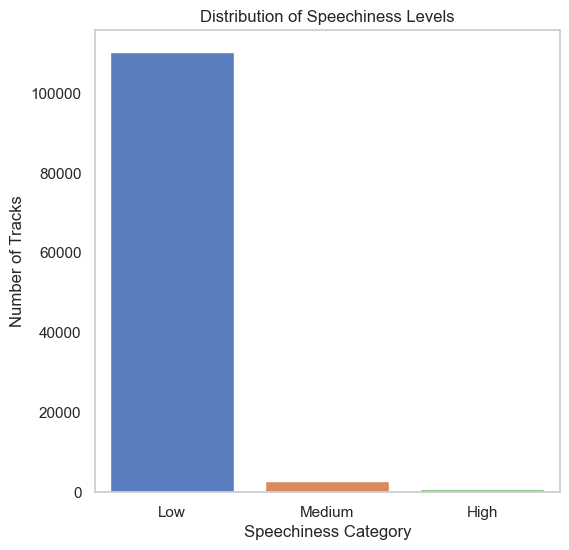

In [555]:
# Categorize speechiness into bins
def speechiness_level(x):
    if x < 0.33:
        return "Low"
    elif x < 0.66:
        return "Medium"
    else:
        return "High"

# Apply and create new column
cleaned_df["speech_level"] = cleaned_df["speechiness"].apply(speechiness_level)

# Preview
print(cleaned_df[["speechiness", "speech_level"]].head())
sns.set(style="whitegrid")
plt.figure(figsize=(6, 6))
sns.countplot(data=cleaned_df, x="speech_level", order=["Low", "Medium", "High"], palette="muted")
plt.title("Distribution of Speechiness Levels")
plt.xlabel("Speechiness Category")
plt.ylabel("Number of Tracks")
plt.grid(axis="y")
plt.show()

   liveness liveness_type
0    0.3580        Studio
1    0.1010        Studio
2    0.1170        Studio
3    0.1320        Studio
4    0.0829        Studio
5    0.1890        Studio
6    0.0913        Studio
7    0.0973        Studio
8    0.1510        Studio
9    0.0735        Studio


/var/folders/r8/17pq6sn558jfc7m45jly_l2r0000gn/T/ipykernel_93585/553284746.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=cleaned_df, x="liveness_type", order=["Studio", "Unclear", "Live"], palette="muted")


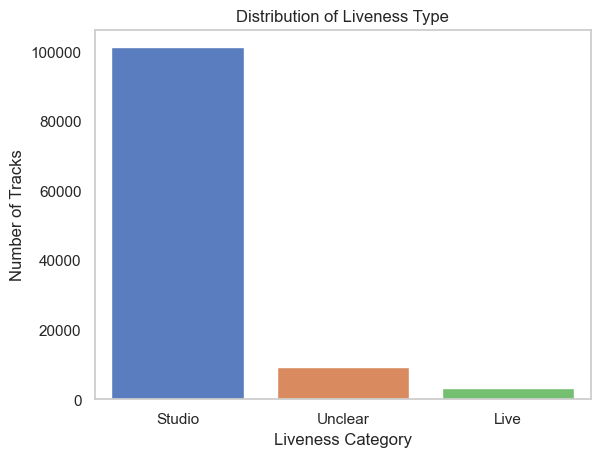

In [556]:
#What does liveness mean? - presence of an audience in a track:
    #Values closer to 1.0 likely live performance (concerts, live recordings)
    #Values closer to 0.0 likely studio recordings
def liveness_level(x):
    if x > 0.8:
        return "Live"
    elif x < 0.4:
        return "Studio"
    else:
        return "Unclear"

cleaned_df["liveness_type"] = cleaned_df["liveness"].apply(liveness_level)

# Optional: quick check
print(cleaned_df[["liveness", "liveness_type"]].head(10))
sns.countplot(data=cleaned_df, x="liveness_type", order=["Studio", "Unclear", "Live"], palette="muted")
plt.title("Distribution of Liveness Type")
plt.xlabel("Liveness Category")
plt.ylabel("Number of Tracks")
plt.grid(axis="y")
plt.show()


In [557]:
cleaned_df.head()

,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,track_genre,instrumental,speech_level,liveness_type
0,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,acoustic,No,Low,Studio
1,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,acoustic,No,Low,Studio
2,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,acoustic,No,Low,Studio
3,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,acoustic,No,Low,Studio
4,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,acoustic,No,Low,Studio


In [558]:
cleaned_df.columns

Index(['artists', 'album_name', 'track_name', 'popularity', 'duration_ms',
       'explicit', 'danceability', 'energy', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'track_genre', 'instrumental', 'speech_level', 'liveness_type'],
      dtype='object')

In [559]:
# List of actual categorical columns
categorical_columns = cleaned_df.select_dtypes(include=["object", "category"]).columns.tolist()
print("Current Categorical Columns:")
print(categorical_columns)

# add potential categorical
potential_cat_from_ints = [col for col in cleaned_df.select_dtypes(include=["int64", "int32"]).columns 
                           if cleaned_df[col].nunique() <= 10]

# Merge both lists
categorical_columns += potential_cat_from_ints
categorical_columns = list(set(categorical_columns))  # Remove duplicates

print("\nFinal Categorical Columns:")
print(categorical_columns)

# Loop through and print value counts for each
for col in categorical_columns:
    print(f"\nClass distribution for '{col}':")
    print(cleaned_df[col].value_counts())
    print("-" * 40)


Current Categorical Columns:
['artists', 'album_name', 'track_name', 'track_genre', 'instrumental', 'speech_level', 'liveness_type']

Final Categorical Columns:
['track_genre', 'artists', 'instrumental', 'album_name', 'mode', 'track_name', 'liveness_type', 'speech_level']

Class distribution for 'track_genre':
track_genre
acoustic       1000
psych-rock     1000
power-pop      1000
pop            1000
pop-film       1000
               ... 
guitar          996
iranian         996
world-music     994
ambient         993
sleep           854
Name: count, Length: 114, dtype: int64
----------------------------------------

Class distribution for 'artists':
artists
The Beatles                         279
George Jones                        271
Stevie Wonder                       236
Linkin Park                         224
Ella Fitzgerald                     222
                                   ... 
Novo Som;Lívia Gavazzi                1
Coral Voice Soul;Jéssica Augusto      1
Stavros Sound

In [560]:
cleaned_df['instrumental'].value_counts(normalize=True)

instrumental
No     0.835473
Yes    0.164527
Name: proportion, dtype: float64

In [564]:
cleaned_df['speech_level'].value_counts(normalize=True)

speech_level
Low       0.968291
Medium    0.023968
High      0.007740
Name: proportion, dtype: float64

In [571]:
cleaned_df['liveness_type'].value_counts(normalize=True)

liveness_type
Studio     0.889762
Unclear    0.080911
Live       0.029328
Name: proportion, dtype: float64

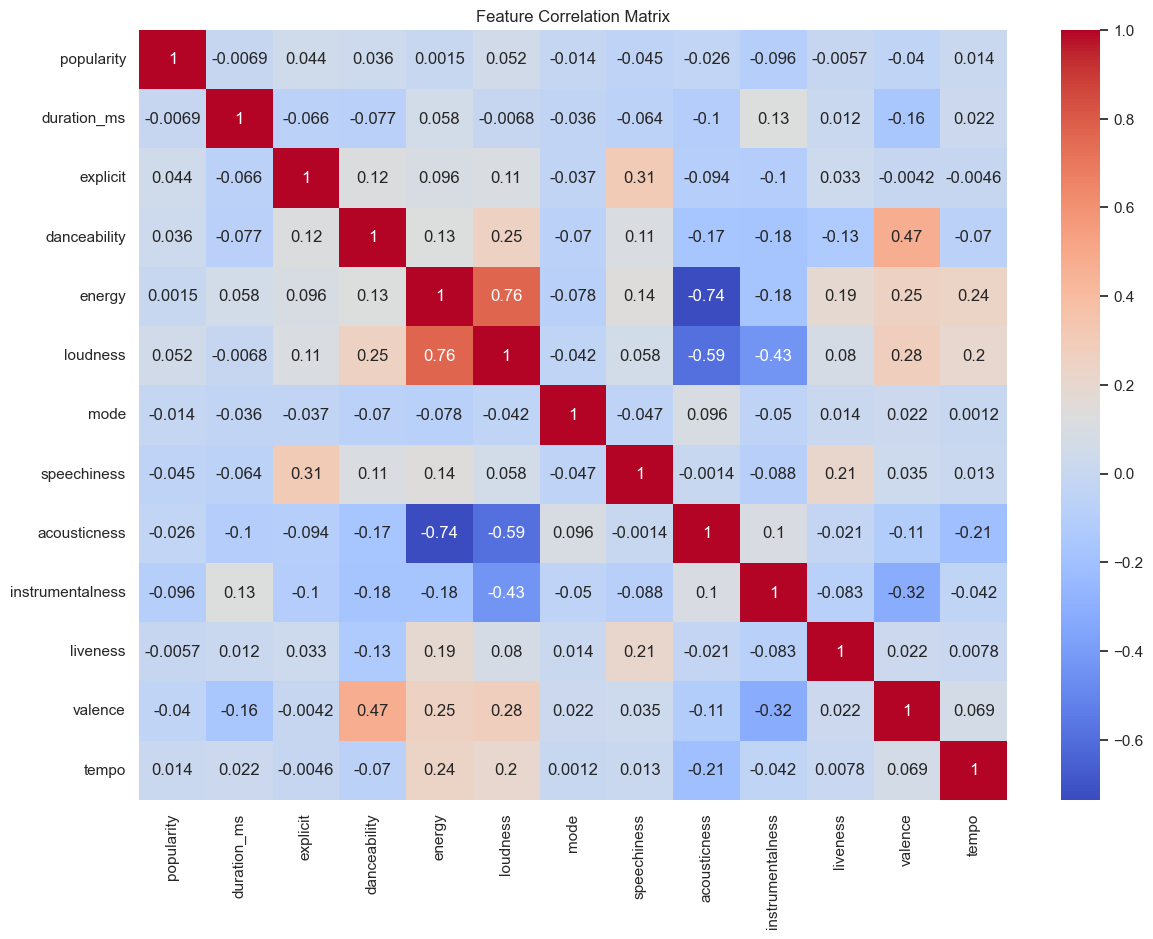

In [574]:
plt.figure(figsize=(14, 10))
corr = cleaned_df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()

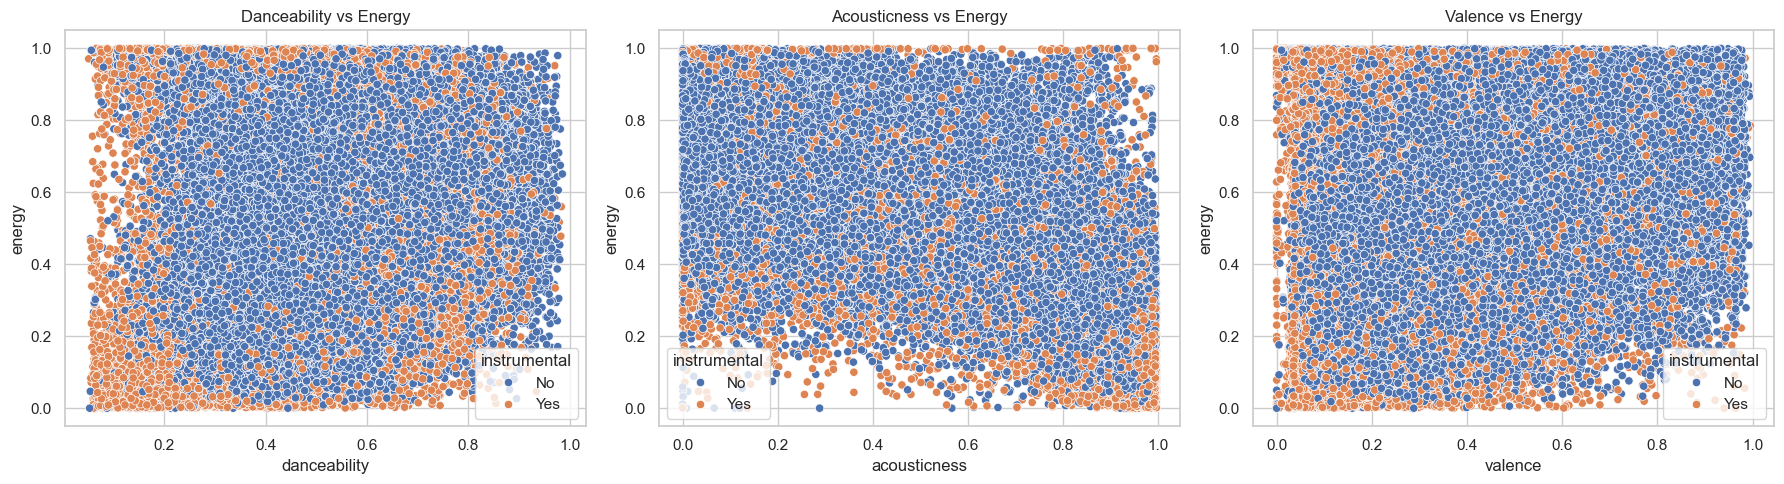

In [576]:
# Set the figure size for 3 subplots in one row
plt.figure(figsize=(18, 5))

# 1st subplot: Danceability vs Energy
#why: bc I excpect Danceability and energy to highly correlate, but it comes in second after loudness and energy; which is okay iguess
   
plt.subplot(1, 3, 1)
sns.scatterplot(data=cleaned_df, x='danceability', y='energy', hue='instrumental')
plt.title("Danceability vs Energy")

# 2nd subplot: Acousticness vs Energy
#Why: There was a strong negative correlation (-0.73) between these in the heatmap.
plt.subplot(1, 3, 2)
sns.scatterplot(data=cleaned_df, x='acousticness', y='energy', hue='instrumental')
plt.title("Acousticness vs Energy")

# 3rd subplot: Valence vs Energy
#Why: This can help show emotional tone — happy (high valence) and energetic songs vs sad, low-energy ones.
#Insight: Are instrumental songs more "neutral" in emotion?
plt.subplot(1, 3, 3)
sns.scatterplot(data=cleaned_df, x='valence', y='energy', hue='instrumental')
plt.title("Valence vs Energy")

# Adjust layout
plt.tight_layout()
plt.show()


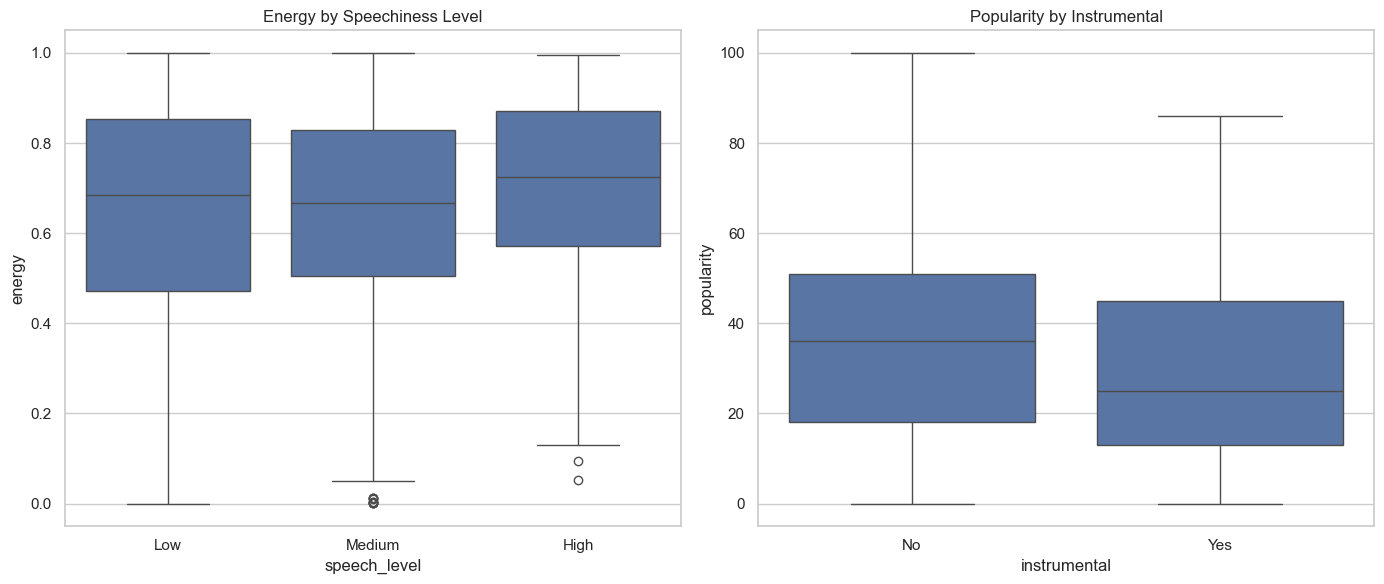

In [577]:
# Set figure size
plt.figure(figsize=(14, 6))

# First subplot: Energy by Speechiness Level
#Why: Spoken-word tracks (e.g. podcasts, rap) tend to have higher speechiness — do they have a distinct energy profile?
plt.subplot(1, 2, 1)
sns.boxplot(data=cleaned_df, x='speech_level', y='energy')
plt.title("Energy by Speechiness Level")

# Second subplot: Popularity by Instrumental
#Why: Do instrumental songs get less attention?
plt.subplot(1, 2, 2)
sns.boxplot(data=cleaned_df, x='instrumental', y='popularity')
plt.title("Popularity by Instrumental")

# Show both plots
plt.tight_layout()
plt.show()

track_genre
drum-and-bass    155.241712
happy            152.908962
hardstyle        146.837452
forro            140.362197
j-idol           136.112004
power-pop        134.651615
dubstep          133.631709
punk             133.600518
trance           133.276726
breakbeat        133.030213
Name: tempo, dtype: float64


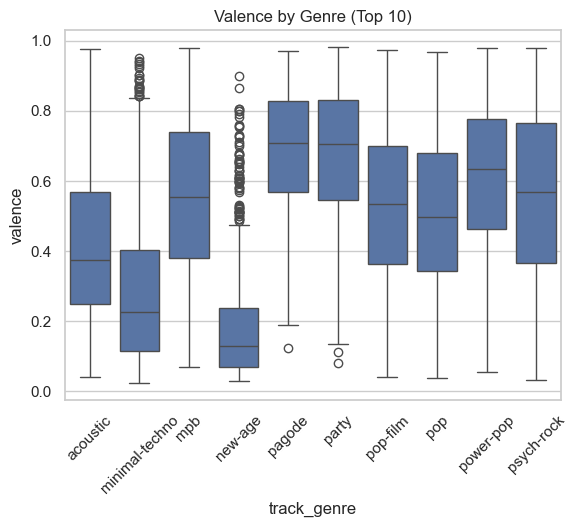

In [578]:
#Group Statistics by Genre
print(cleaned_df.groupby("track_genre")["tempo"].mean().sort_values(ascending=False).head(10))


top_genres = cleaned_df["track_genre"].value_counts().head(10).index
sns.boxplot(data=cleaned_df[cleaned_df["track_genre"].isin(top_genres)],
            x="track_genre", y="valence")
plt.xticks(rotation=45)
plt.title("Valence by Genre (Top 10)")
plt.show()
